In [2]:
import time

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from FNN_single_layer_parameterized import SimpleNN, generate_linearly_separable_data
from circuits import forward_propagation_partial
from utils import test_accuracy, plot_decision_boundary

Partial Derivatives:
d/dx: (1 * y)
d/dy: ((1 * y) + (1 * (x + y)))
9


In [3]:
dim_list = []
forward_ad_times = []
full_forward_ad_times = []
reverse_ad_times = []
full_reverse_ad_times = []
for dimensions in [*range(2, 10), 15, 20, 40, 60, 80, 100]:
    print(f"Training with {dimensions} dimensions")
    dim_list.append(dimensions)
    X, y = generate_linearly_separable_data(50, dimensions, separation=1, noise=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    nn = SimpleNN(dimensions, 1)
    
    gradients3_total = 0
    gradients4_total = 0
    
    full_forward_ad = 0
    full_reverse_ad = 0
    
    start_time = time.time()
    accuracy = 0
    epoch = 0
    max_epochs = 100
    
    
    while epoch < max_epochs:
        start = time.time()
        nn.reset_timer()
        gradients3 = nn.backpropagation_with_forward_AD(X_train, y_train)
        gradients3_total += nn.get_timer()
        full_forward_ad += time.time() - start
    
        start = time.time()
        nn.reset_timer()
        gradients4 = nn.backpropagation_with_reverse_AD(X_train, y_train)
        gradients4_total += nn.get_timer()
        full_reverse_ad += time.time() - start
    
        nn.update_weights(gradients4, lr=0.01)
        
        if epoch % 100 == 0:
            y_pred_test = nn.forward(X_test)
            accuracy = test_accuracy(y_test, y_pred_test)
            print(f"Epoch {epoch}: Test accuracy = {accuracy:.2f}")
    
        epoch += 1
    
    backprop_time = time.time() - start_time
    print(f"Forward AD took {gradients3_total:.5f} seconds")
    print(f"Reverse AD took {gradients4_total:.5f} seconds")
    forward_ad_times.append(gradients3_total)
    reverse_ad_times.append(gradients4_total)
    
    full_forward_ad_times.append(full_forward_ad)
    full_reverse_ad_times.append(full_reverse_ad)
    

Training with 2 dimensions
Epoch 0: Test accuracy = 0.00
Forward AD took 0.13440 seconds
Reverse AD took 0.10304 seconds
Training with 3 dimensions
Epoch 0: Test accuracy = 0.50
Forward AD took 0.22379 seconds
Reverse AD took 0.16253 seconds
Training with 4 dimensions
Epoch 0: Test accuracy = 1.00
Forward AD took 0.30578 seconds
Reverse AD took 0.21284 seconds
Training with 5 dimensions
Epoch 0: Test accuracy = 0.95
Forward AD took 0.47310 seconds
Reverse AD took 0.32303 seconds
Training with 6 dimensions
Epoch 0: Test accuracy = 0.80
Forward AD took 0.54309 seconds
Reverse AD took 0.36825 seconds
Training with 7 dimensions
Epoch 0: Test accuracy = 0.80
Forward AD took 0.68290 seconds
Reverse AD took 0.45191 seconds
Training with 8 dimensions
Epoch 0: Test accuracy = 0.70
Forward AD took 0.82003 seconds
Reverse AD took 0.54155 seconds
Training with 9 dimensions
Epoch 0: Test accuracy = 0.20
Forward AD took 0.98980 seconds
Reverse AD took 0.64784 seconds
Training with 15 dimensions
Epoc

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_ad_times, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_ad_times, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse Accumulation - Weight Adjustment Calculation Time") 
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid()
plt.show()

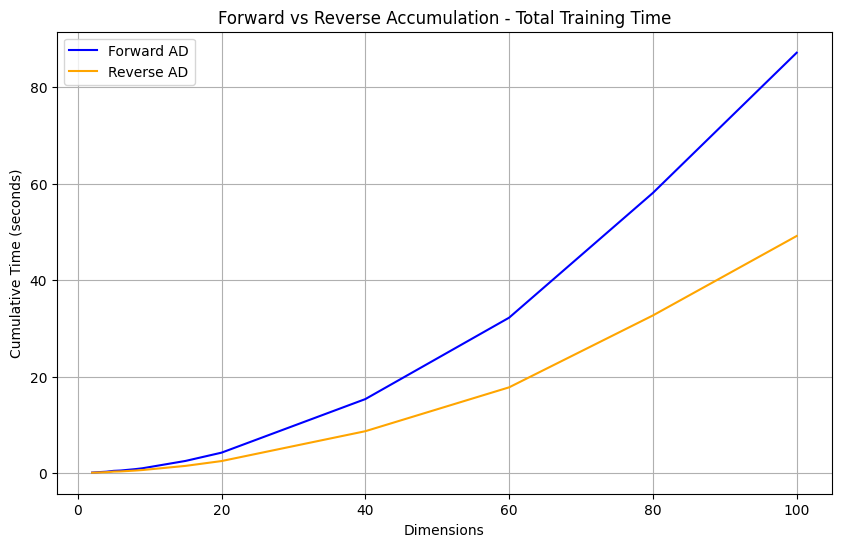

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, full_forward_ad_times, label="Forward AD", color="blue")
plt.plot(dim_list, full_reverse_ad_times, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse Accumulation - Total Training Time")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid()
plt.show()

In [6]:
print(full_forward_ad_times)
print(full_reverse_ad_times)

[0.14696931838989258, 0.24123787879943848, 0.32492613792419434, 0.5026283264160156, 0.5733425617218018, 0.7171981334686279, 0.8577144145965576, 1.0350446701049805, 2.55968976020813, 4.271008014678955, 15.369987726211548, 32.23573875427246, 58.08521914482117, 87.13316774368286]
[0.11355090141296387, 0.17577743530273438, 0.2271285057067871, 0.34697651863098145, 0.38822412490844727, 0.4743485450744629, 0.5637195110321045, 0.6719226837158203, 1.5325756072998047, 2.53009295463562, 8.714882850646973, 17.80494713783264, 32.69787836074829, 49.161760091781616]


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, [x - y for x, y in zip(full_forward_ad_times, forward_ad_times)], label="Forward AD", color="blue")
plt.plot(dim_list, [x - y for x, y in zip(full_reverse_ad_times, reverse_ad_times)], label="Reverse AD", color="orange")
plt.title("Forward vs Reverse Accumulation - Gradient Calculation Time")
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Time (seconds)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from circuits import back_propagation_partial

dim_list = []
forward_partial_size_list = []
reverse_partial_size_list = []

# for dimensions in [*range(2, 10), 15, 20, 40, *range(100, 2000, 100), 2000]:
for dimensions in [*range(2, 10), 15, 20, 40, *range(100, 1200, 100)]:
    dim_list.append(dimensions)
    nn = SimpleNN(dimensions, 1)
    inputs, outputs, weights_1, biases_1 = nn.get_inputs_weights_biases()
    s_sigmoid_loss = nn.get_output_equation()
    
    # forward
    partials = [forward_propagation_partial(s_sigmoid_loss, weights_1[i]) for i in range(nn.input_size)]
    partials += [forward_propagation_partial(s_sigmoid_loss, biases_1[0])]
    forward_partials_size = sum(partial.get_size() for partial in partials)
    forward_partial_size_list.append(forward_partials_size)
    
    # reverse
    partials_object = back_propagation_partial(s_sigmoid_loss)
    partials = [partials_object.get_derivative(i) for i in [*weights_1, *biases_1]]
    reverse_partials_size = sum(partial.get_size() for partial in partials)
    reverse_partial_size_list.append(reverse_partials_size)
    print("Done with", dimensions)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_partial_size_list, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
plt.title("Forward vs Reverse Accumulation - Gradient Size")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_partial_size_list, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
# plot just dim_list squared
plt.plot(dim_list, [20*dim**2 for dim in dim_list], label="20 * d^2", color="purple")
plt.plot(dim_list, [12*dim**2 for dim in dim_list], label="12 * d^2", color="red")
plt.plot(dim_list, [8*dim for dim in dim_list], label="8 * d", color="green")
plt.title("Forward vs Reverse AD Gradient Size Comparison - 100 dimensions")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()

In [4]:
from circuits import *

dim_list = []
forward_partial_size_list = []
reverse_partial_size_list = []

# for dimensions in [*range(2, 10), 15, 20, 40, *range(100, 2000, 100), 2000]:
for dimensions in range(2, 101):
    dim_list.append(dimensions)
    nn = SimpleNN(dimensions, 1)
    inputs, outputs, weights_1, biases_1 = nn.get_inputs_weights_biases()
    s_sigmoid_loss = nn.get_output_equation()
    
    # forward
    partials = [forward_propagation_partial(s_sigmoid_loss, weights_1[i]) for i in range(nn.input_size)]
    partials += [forward_propagation_partial(s_sigmoid_loss, biases_1[0])]
    forward_partials_size = sum(partial.get_size() for partial in partials)
    forward_partial_size_list.append(forward_partials_size)
    
    # reverse
    partials_object = back_propagation_partial(s_sigmoid_loss)
    partials = [partials_object.get_derivative(i) for i in [*weights_1, *biases_1]]
    reverse_partials_size = partials_object.reverse_count
    reverse_partial_size_list.append(reverse_partials_size)
    print("Done with", dimensions)

Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9
Done with 10
Done with 11
Done with 12
Done with 13
Done with 14
Done with 15
Done with 16
Done with 17
Done with 18
Done with 19
Done with 20
Done with 21
Done with 22
Done with 23
Done with 24
Done with 25
Done with 26
Done with 27
Done with 28
Done with 29
Done with 30
Done with 31
Done with 32
Done with 33
Done with 34
Done with 35
Done with 36
Done with 37
Done with 38
Done with 39
Done with 40
Done with 41
Done with 42
Done with 43
Done with 44
Done with 45
Done with 46
Done with 47
Done with 48
Done with 49
Done with 50
Done with 51
Done with 52
Done with 53
Done with 54
Done with 55
Done with 56
Done with 57
Done with 58
Done with 59
Done with 60
Done with 61
Done with 62
Done with 63
Done with 64
Done with 65
Done with 66
Done with 67
Done with 68
Done with 69
Done with 70
Done with 71
Done with 72
Done with 73
Done with 74
Done with 75
Done with 76
Done with 77
Done with 78
Done wi

In [8]:
print([int(x/8-4) for x in reverse_partial_size_list] == [*range(0, 98)])
print(len(reverse_partial_size_list))

False
99


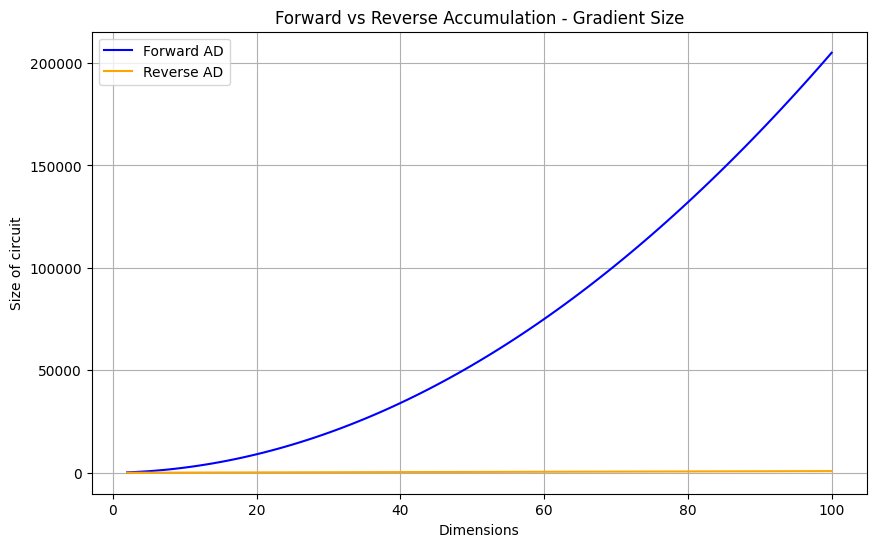

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(dim_list, forward_partial_size_list, label="Forward AD", color="blue")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
# plot just dim_list squared
# plt.plot(dim_list, [20*dim**2 for dim in dim_list], label="20 * d^2", color="purple")
# plt.plot(dim_list, [12*dim**2 for dim in dim_list], label="12 * d^2", color="red")
# plt.plot(dim_list, [8*dim for dim in dim_list], label="8 * d", color="green")
plt.title("Forward vs Reverse Accumulation - Gradient Size")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()

In [9]:
forward_partial_size_list[:10]

[210, 360, 550, 780, 1050, 1360, 1710, 2100, 2530, 3000]

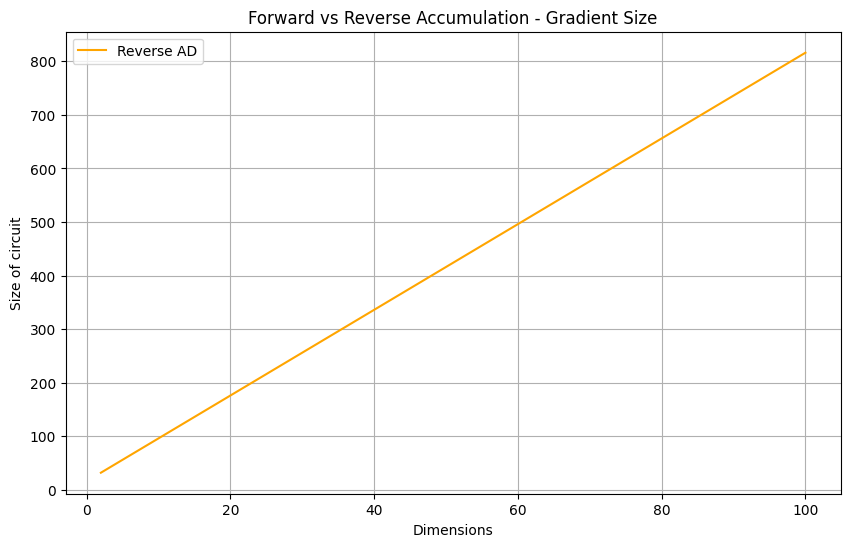

In [13]:

plt.figure(figsize=(10, 6))
# plt.plot(dim_list[:5], forward_partial_size_list[:5], label="Forward AD", color="blue")
# plt.plot(dim_list, [20*dim**2 for dim in dim_list], label="20 * d^2", color="purple")
plt.plot(dim_list, reverse_partial_size_list, label="Reverse AD", color="orange")
# plot just dim_list squared
# plt.plot(dim_list, [20*dim**2 for dim in dim_list], label="20 * d^2", color="purple")
# plt.plot(dim_list, [12*dim**2 for dim in dim_list], label="12 * d^2", color="red")
# plt.plot(dim_list, [8*dim for dim in dim_list], label="8 * d", color="green")
plt.title("Forward vs Reverse Accumulation - Gradient Size")
plt.xlabel("Dimensions")
plt.ylabel("Size of circuit")
plt.legend()
plt.grid()
plt.show()